In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Simple linear regression
a straight-line fit, $y = ax + b$

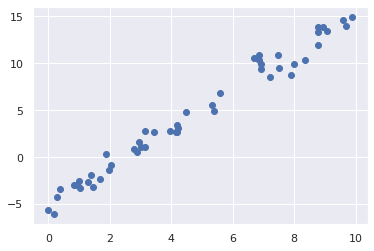

In [2]:
rng = np.random.RandomState(1)
x = 10* rng.rand(50)
y = 2*x -5 + rng.randn(50)
plt.scatter(x, y)

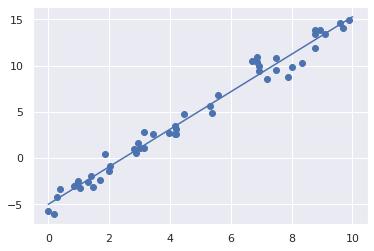

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [4]:
print("Model slope:     ", model.coef_[0])
print("model intercept: ", model.intercept_)

Model slope:      2.027208810360695
model intercept:  -4.998577085553202


it can also handle multidimensional linear models of the form $y = a_0 + a_1x_1 + a_2x_2 + ...$

In [5]:
rng = np.random.RandomState(1)
X = 10*rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


# Basis function regression
Regular linear regression can only fit linear relationship. What if we want to fit non-linear relationship? Transform data according to *basis functions*  
$$x_n = f_n(x)$$
Where fn(x) is some function that transforms data.  
For example, if $f_n(x) = x^n$, our model becomes
$$y = a_0 + a_1x + a_2x^2 + a_3x^3 + ...$$
However, this is still a linear model, since coefficients $a_n$ never multiply or divide each other. 
## Polynomial basis functions

In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

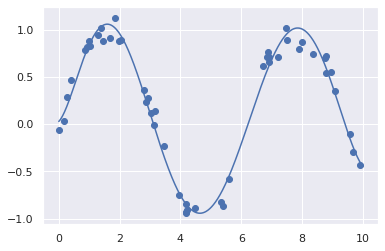

In [8]:
# sine with noise
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = np.sin(x) + 0.1*rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

## Gaussian basis functions

(0, 10)

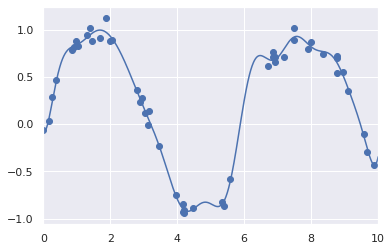

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    def _gauss_basis(self, x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5*np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                           LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

## Regularization
basis functions may lead to overfitting

(-1.5, 1.5)

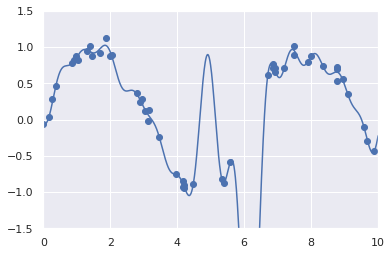

In [20]:
model = make_pipeline(GaussianFeatures(30),
                     LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)